# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [1]:
# WRITE YOUR CODE HERE

set.seed(1)
model_bs <- runif(4,min = 0, max = 100)


b0 <- model_bs[1]
b1 <- model_bs[2]
b2 <- model_bs[3]
b3 <- model_bs[4]

x <- rnorm(100)
err <- rnorm(100)


y <- b0 + (b1*x) + (b2*(x^2)) + (b3+(x^3)) + err

df <- data.frame(y, x)
head(df)
dim(df)


,y,x
,<dbl>,<dbl>
1,124.7824,-0.8356286
2,326.7404,1.5952808
3,135.2344,0.3295078
4,126.6177,-0.8204684
5,149.9528,0.4874291
6,177.3867,0.7383247


[1] 100   2

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [4]:
# WRITE YOUR CODE HERE
#install.packages("leaps")

for (i in 2:10) {
  df[paste0("x",i)] <- df$x^i
}

library(leaps)
model <- regsubsets(y ~ ., df, nvmax=10)

model_sum <- summary(model)
model_sum



Subset selection object
Call: regsubsets.formula(y ~ ., df, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " "*" " " " " " " " " " " " " " " " "
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " "*" " " " " " " " " " "
5  ( 1 )  "*" "*" "*" "*" "*" " " " " " " " " " "
6  ( 1 )  "*" "*" "*" " " " " " " "*" "*" "*" " "
7  ( 1 )  "*" "*" "*" " " "*" "*" " " "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" "*" "*"
9  ( 1 )  "*" "*" " " "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


[1] 0.8293864


[1] 4

(Intercept)          x4          x6         x11         x18 
 0.05664034  0.78321372  1.09862232  1.07642657  0.70034502

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


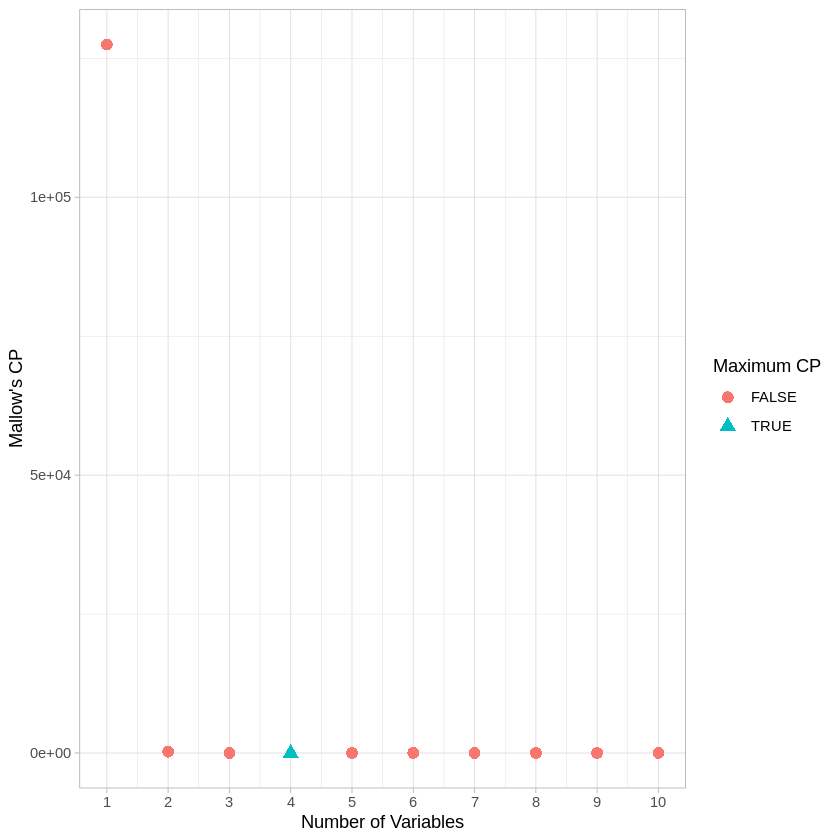

[1] -862.2559


[1] 3

(Intercept)          x4          x6         x11 
 0.07255049  0.88410099  1.22454480  1.05905928

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


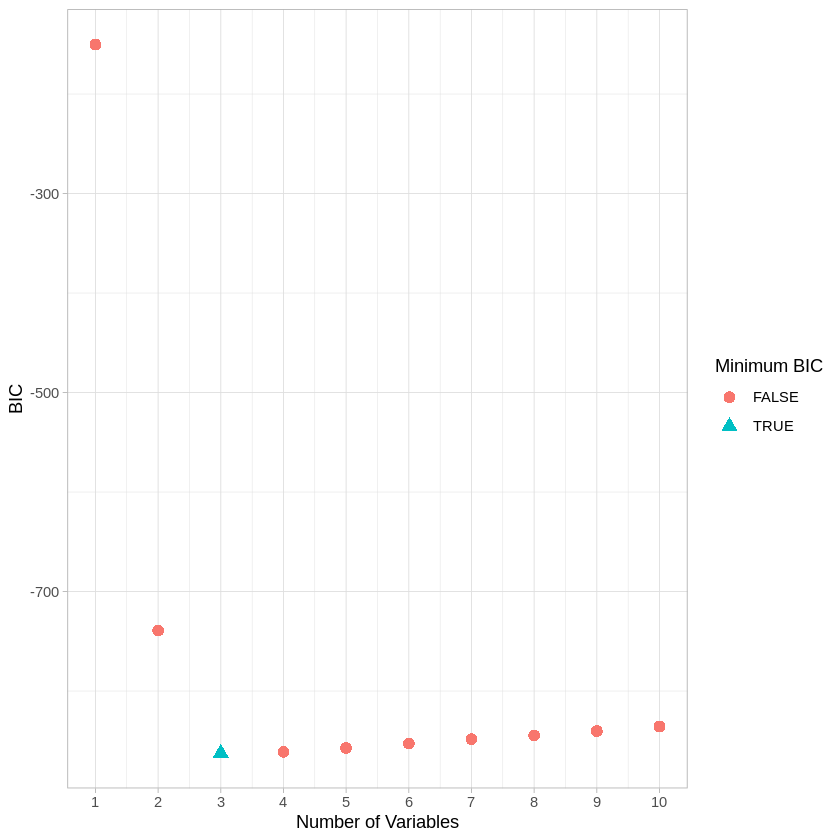

[1] 0.9998494


[1] 4

(Intercept)          x4          x6         x11         x18 
 0.05664034  0.78321372  1.09862232  1.07642657  0.70034502

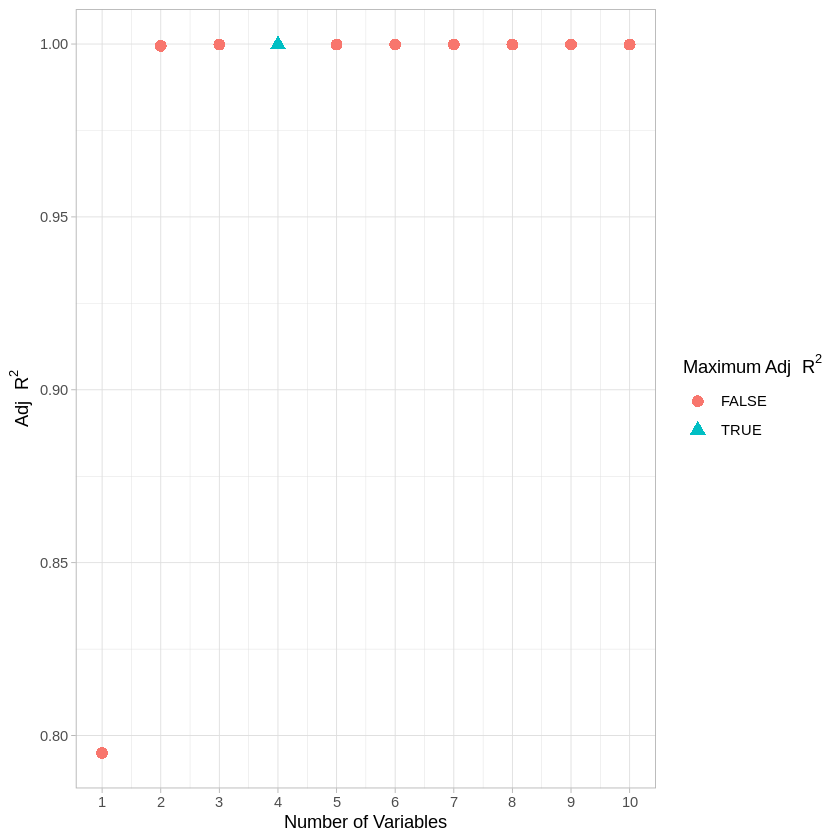

In [11]:
# WRITE YOUR CODE HERE

library(ggplot2)

numvar = 1:length(model_sum$rss)

# Starting point for an indicator that marks the best model choice for each metric.
allfalse = rep(FALSE,length(model_sum$rss))

## Mallow's Cp: 
cp.df <- data.frame(numvar = numvar, cp <- model_sum$cp, mincp <- allfalse)
cp.df$mincp[which.min(model_sum$cp)] <- TRUE

ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
     geom_point(size=3) + theme_light() + 
     xlim(0,10)+ 
     scale_x_continuous(breaks=seq(0,10,1)) +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP",
     shape="Maximum CP")

print(min(cp))
which.min(cp)
coef(model, which.min(cp))



# BIC
bic.df <- data.frame(numvar = numvar,bic <- model_sum$bic, minbic <- allfalse)
bic.df$minbic[which.min(model_sum$bic)] <- TRUE

ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    xlim(0,10)+
    scale_x_continuous(breaks=seq(0,10,1)) +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

print(min(bic))
which.min(bic)
coef(model, which.min(bic))


#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- model_sum$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(model_sum$adjr2)] <- TRUE

ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    xlim(0,10)+
    scale_x_continuous(breaks=seq(0,10,1)) +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)


print(max(adjr2))
which.max(adjr2)
coef(model, which.max(adjr2))

> *Write your response here* 

Two of our three results show us that 4 terms in the best model. The coefficients are as follows:


> Adj r^2
*   x4 0.0566
*   x6 0.7832
*   x11 1.0986
*   x18 1.0764


> Mallow's cp
*   x4 0.0566
*   x6 0.7832
*   x11 1.0986
*   x18 1.0764

> BIC
*   x4 0.0725
*   x6 0.8841
*   x11 1.2245




---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., df, nvmax = 10, method = c("forward"))
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " "*" " " " " " " " " " " " " " " " "
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " "*" " " " " " " " " " "
5  ( 1 )  "*" "*" "*" "*" "*" " " " " " " " " " "
6  ( 1 )  "*" "*" "*" "*" "*" " " " " " " "*" " "
7  ( 1 )  "*" "*" "*" "*" "*" "*" " " " " "*" " "
8  ( 1 )  "*" "*" "*" "*" "*" "*" "*" " " "*" " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " "
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "

[1] 0.8293864


[1] 4

(Intercept)            x           x2           x3           x5 
117.48404994  37.56049370  57.11692447   0.57981982   0.07820999

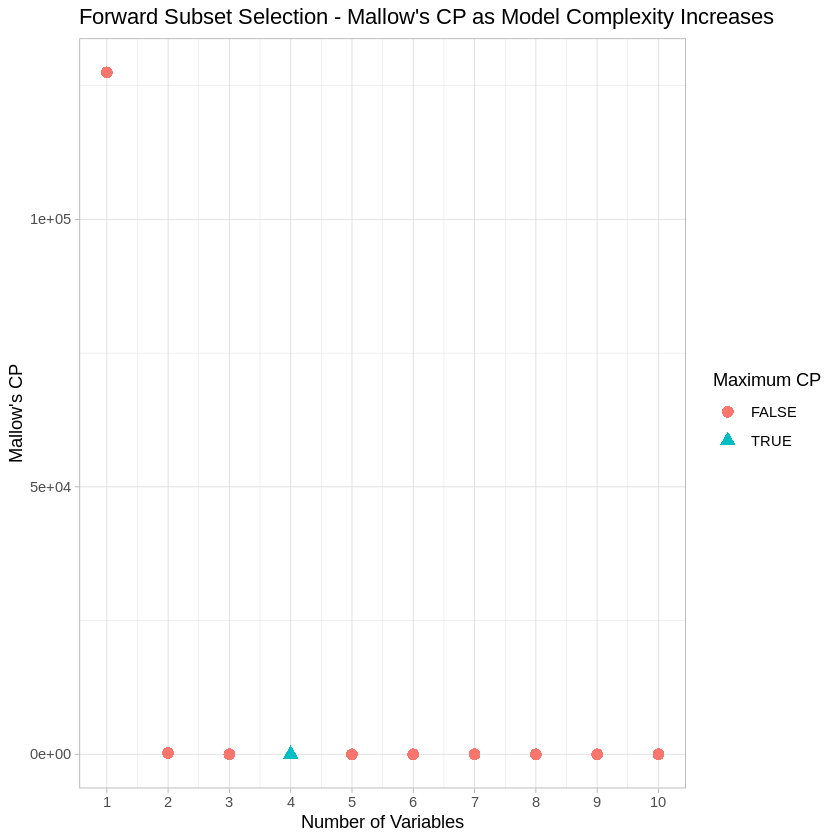

[1] -862.2559


[1] 3

(Intercept)           x          x2          x3 
 117.473115   37.160790   57.146740    1.025259

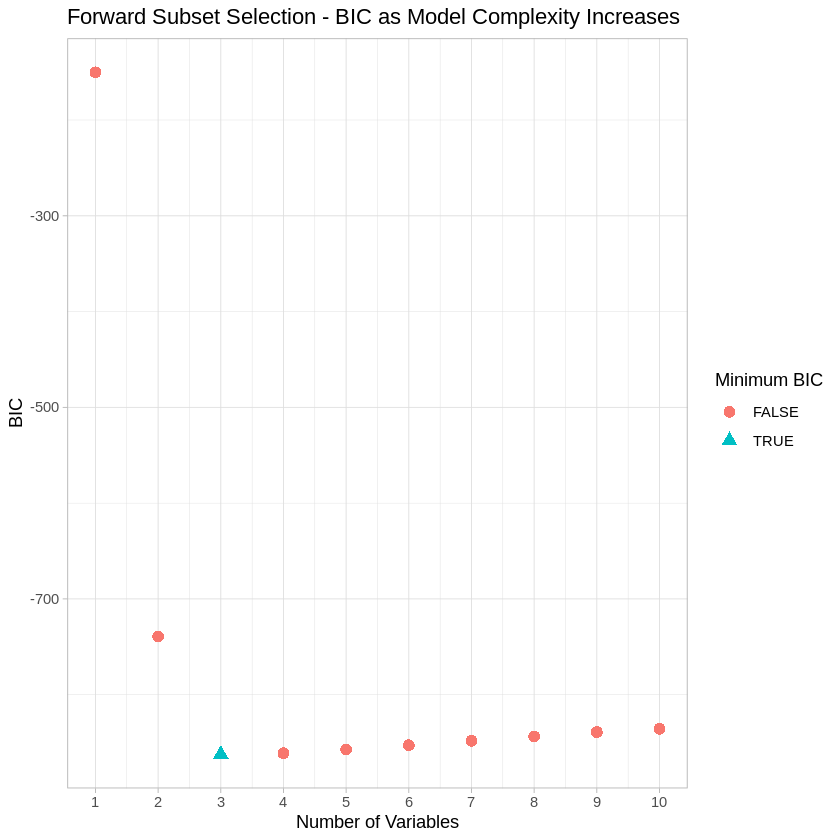

[1] 0.9998494


[1] 4

(Intercept)            x           x2           x3           x5 
117.48404994  37.56049370  57.11692447   0.57981982   0.07820999

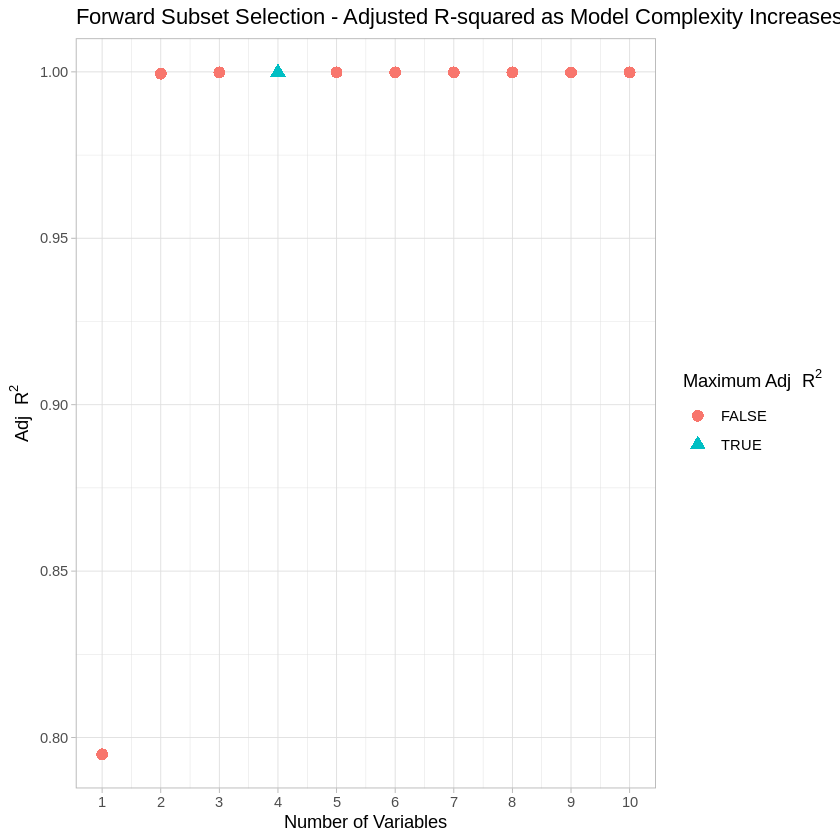

In [16]:
# WRITE YOUR CODE HERE
forward <- regsubsets(y ~ ., df, nvmax = 10, method = c("forward"))
forward_sum <- summary(forward)
forward_sum 


## Mallow's Cp: 
cp.df_forward <- data.frame(numvar = numvar, cp_forward <- forward_sum$cp,
                            mincp_forward <- allfalse)
cp.df_forward$mincp_forward[which.min(forward_sum$cp)] <- TRUE

ggplot(cp.df_forward, aes(x=numvar, y=cp_forward, shape=mincp_forward, col=mincp_forward)) +
  geom_point(size=3) + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP",
       title = "Forward Subset Selection - Mallow's CP as Model Complexity Increases") +
  theme_light()

print(min(cp_forward))
which.min(cp_forward)
coef(forward, which.min(cp_forward))


# BIC
bic.df_forward <- data.frame(numvar = numvar,bic_forward <- forward_sum$bic,
                             minbic_forward <- allfalse)

bic.df_forward$minbic_forward[which.min(forward_sum$bic)] <- TRUE

ggplot(bic.df_forward,aes(x=numvar,y=bic_forward,shape=minbic_forward,col=minbic_forward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC",
       title = "Forward Subset Selection - BIC as Model Complexity Increases")

print(min(bic_forward))
which.min(bic_forward)
coef(forward, which.min(bic_forward))


#adjr2
adjr2.df_forward <- data.frame(numvar = numvar, adjr2_forward <- forward_sum$adjr2,
                               maxadjr2_forward <- allfalse)
adjr2.df_forward$maxadjr2_forward[which.max(forward_sum$adjr2)] <- TRUE

ggplot(adjr2.df_forward,aes(x=numvar,y=adjr2_forward,shape=maxadjr2_forward,col=maxadjr2_forward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2,
       title = "Forward Subset Selection - Adjusted R-squared as Model Complexity Increases")

print(max(adjr2_forward))
which.max(adjr2_forward)
coef(forward, which.max(adjr2_forward))



In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., df, nvmax = 10, method = c("backward"))
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " "*" " " " " " " " " " " " " " " " "
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" " " " " "*" " " " " " " " " " "
4  ( 1 )  "*" "*" " " " " "*" " " "*" " " " " " "
5  ( 1 )  "*" "*" " " " " "*" " " "*" "*" " " " "
6  ( 1 )  "*" "*" " " " " "*" " " "*" "*" "*" " "
7  ( 1 )  "*" "*" " " " " "*" " " "*" "*" "*" "*"
8  ( 1 )  "*" "*" " " " " "*" "*" "*" "*" "*" "*"
9  ( 1 )  "*" "*" " " "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*"

[1] 1.80659


[1] 4

(Intercept)            x           x2           x5           x7 
117.47257130  37.89070605  57.13520465   0.30772764  -0.02481336

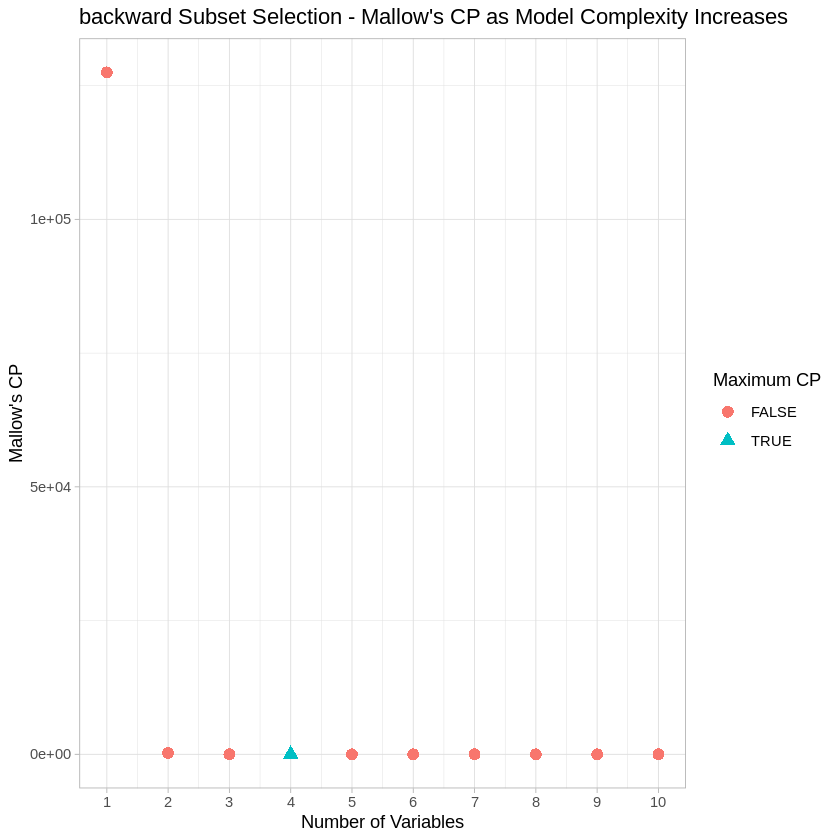

[1] -860.2561


[1] 3

(Intercept)           x          x2          x5 
117.4870597  38.1377366  57.0912518   0.1732465

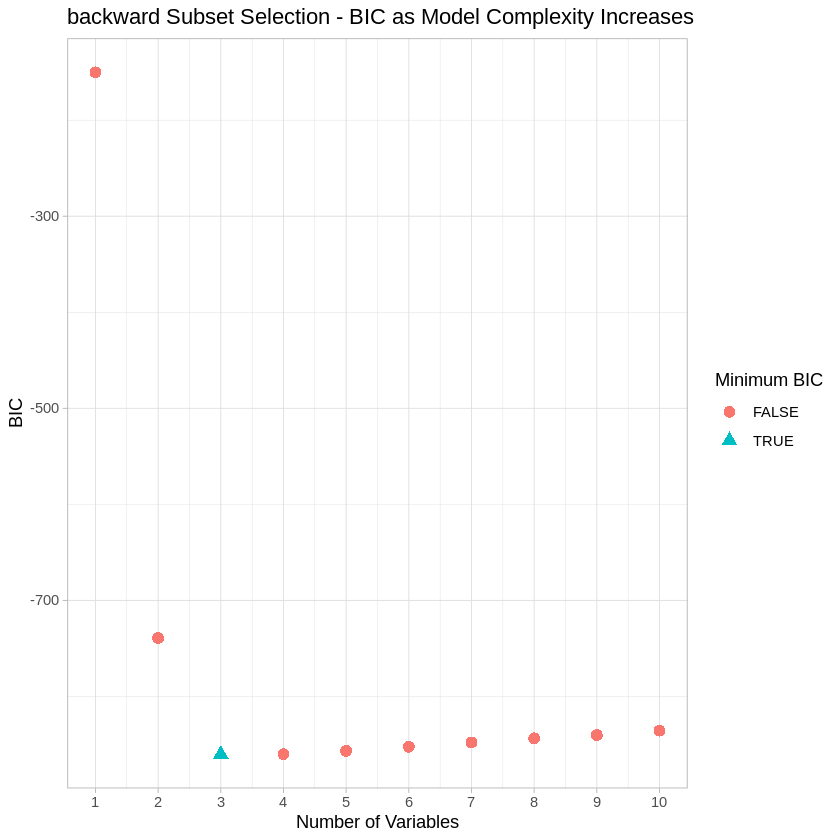

[1] 0.999848


[1] 5

(Intercept)             x            x2            x5            x7 
117.527191282  37.857939297  57.016976960   0.342868660  -0.032714424 
           x8 
  0.001617521

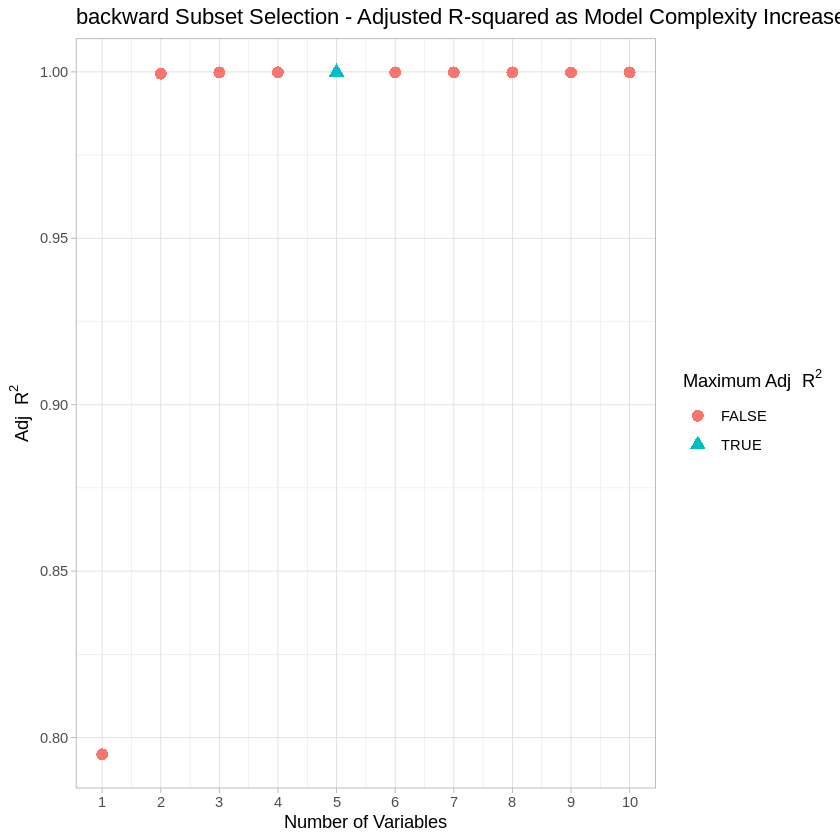

In [17]:
# WRITE YOUR CODE HERE
backward <- regsubsets(y ~ ., df, nvmax = 10, method = c("backward"))
backward_sum <- summary(backward)
backward_sum 


## Mallow's Cp: 
cp.df_backward <- data.frame(numvar = numvar, cp_backward <- backward_sum$cp,
                             mincp_backward <- allfalse)
cp.df_backward$mincp_backward[which.min(backward_sum$cp)] <- TRUE

ggplot(cp.df_backward, aes(x=numvar, y=cp_backward, shape=mincp_backward, col=mincp_backward)) +
  geom_point(size=3) + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP",
       title = "backward Subset Selection - Mallow's CP as Model Complexity Increases") +
  theme_light()

print(min(cp_backward))
which.min(cp_backward)
coef(backward, which.min(cp_backward))


# BIC
bic.df_backward <- data.frame(numvar = numvar,bic_backward <- backward_sum$bic,
                             minbic_backward <- allfalse)

bic.df_backward$minbic_backward[which.min(backward_sum$bic)] <- TRUE

ggplot(bic.df_backward,aes(x=numvar,y=bic_backward,shape=minbic_backward,col=minbic_backward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC",
       title = "backward Subset Selection - BIC as Model Complexity Increases")

print(min(bic_backward))
which.min(bic_backward)
coef(backward, which.min(bic_backward))


#adjr2
adjr2.df_backward <- data.frame(numvar = numvar, adjr2_backward <- backward_sum$adjr2,
                               maxadjr2_backward <- allfalse)
adjr2.df_backward$maxadjr2_backward[which.max(backward_sum$adjr2)] <- TRUE

ggplot(adjr2.df_backward,aes(x=numvar,y=adjr2_backward,shape=maxadjr2_backward,col=maxadjr2_backward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2,
       title = "backward Subset Selection - Adjusted R-squared as Model Complexity Increases")

print(max(adjr2_backward))
which.max(adjr2_backward)
coef(backward, which.max(adjr2_backward))




In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> *Write your response here* 

Results from our forward stepwise regression were similar to our prior analyis. The backward stepwise had slightly different findings, where 5 terms were selected. We get lowest Mallow's cp for forward stepwise regression (4 terms). We get lowest BIC for backwards stepwise (3 terms). We get highest adjusted R^2 with backwards stepwise (5 terms).

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [18]:
# WRITE YOUR CODE HERE
set.seed(1)

df2 <- matrix(NA, nrow=1000, ncol=21)
err2 <- rnorm(1000)

for (i in 2:21) {
  df2[,i] <- rnorm(1000)
}

beta = runif(20)
beta[sample(20, 5)] = 0
print(beta)

for (i in 1:nrow(df2)) {
  df2[i,1] = (df2[i,2:21] %*% beta) + err2[i]
}

df2 <- data.frame(df2)
colnames(df2) <- append("y", paste0("x", 1:20))

## Create test train split
train <- sample(nrow(df2) * 0.1)
df2_train <- df2[train,]
df2_test <- df2[-train,]

dim(df2_train)
dim(df2_test)

 [1] 0.726110490 0.000000000 0.002827729 0.941650527 0.572021482 0.883971442
 [7] 0.000000000 0.207158200 0.761758723 0.000000000 0.876419525 0.740631339
[13] 0.599081832 0.105408210 0.135853268 0.328763283 0.645211214 0.498389847
[19] 0.000000000 0.000000000


[1] 100  21

[1] 900  21

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

Subset selection object
Call: regsubsets.formula(y ~ ., df2_train, nvmax = 20)
20 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14 x15 x16 x17
1  ( 1 )  " " " " " " " " " " "*" " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " " " " " " " "*" " " " " " " " " "*" " " " " " " " " " " " "
3  ( 1 )  " " " " " " "*" " " "*" " " " " " " " " "*" " " " " " " " 

(Intercept)          x1          x2          x3          x4          x5 
 0.09698154  0.57589452  0.12730021  0.08774704  0.85633647  0.50629949 
         x6          x7          x8          x9         x10         x11 
 1.02851871  0.03233621  0.18351154  0.71117098 -0.07837124  0.99913186 
        x12         x13         x14         x15         x16         x17 
 0.63469521  0.53555358  0.04799907  0.01954986  0.33384825  0.58265093 
        x18         x19         x20 
 0.43719211 -0.04792391  0.06944347 


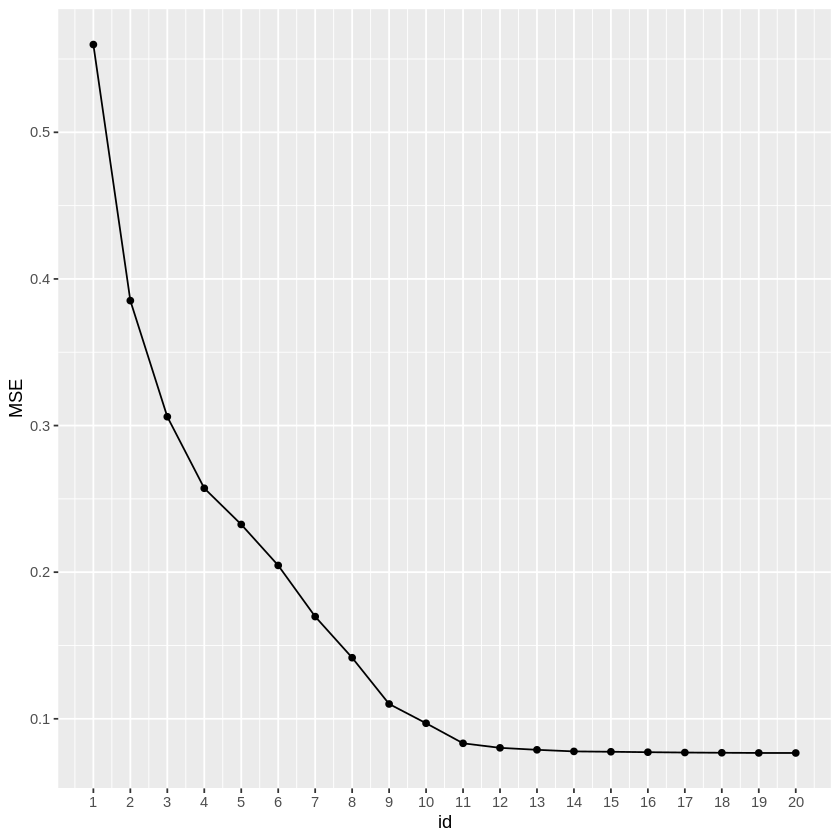

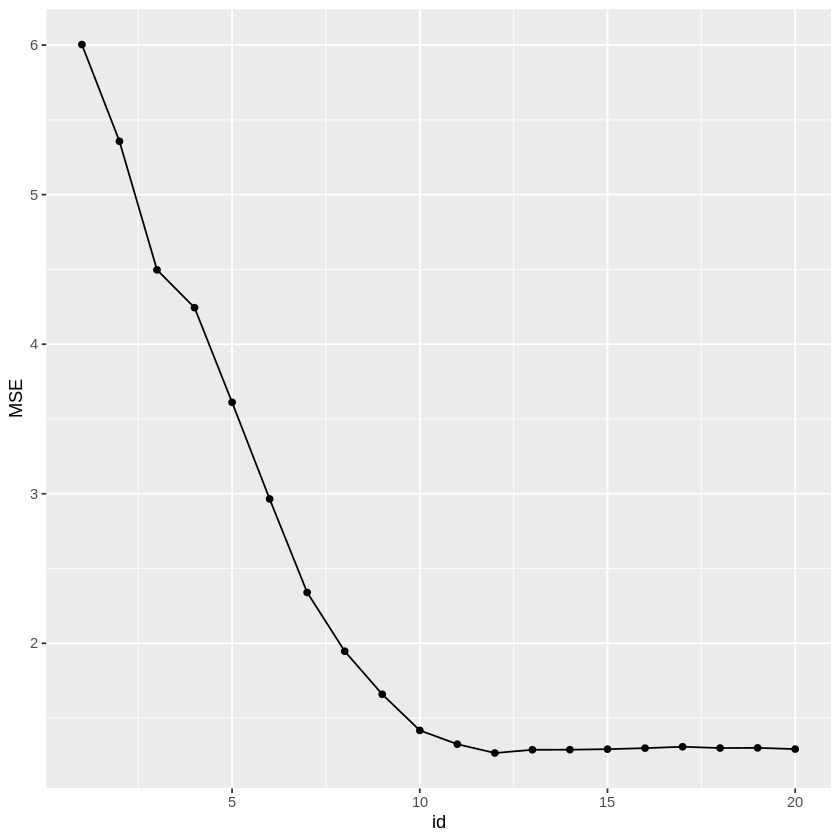

In [19]:
# WRITE YOUR CODE HERE
library(tidyverse)

model <- regsubsets(y ~ ., df2_train, nvmax = 20)
sum <- summary(model)
sum


tibble(MSE = sum$rss/900) %>%
  mutate(id = row_number()) %>%
  ggplot(aes(id, MSE)) + 
  geom_line() +
  geom_point() + 
  scale_x_continuous(breaks = 1:20)


test_errors = rep(NA, 19)
test.matrix <- model.matrix(y ~ ., data = df2_test)

for (i in 1:20) {
  coeffs = coef(model, id = i)
  pred = test.matrix[,names(coeffs)]%*%coeffs
  test_errors[i] = mean((df2_test$y-pred)^2)
}

print(coeffs)

tibble(MSE = test_errors) %>%
  mutate(id = row_number()) %>%
  ggplot(aes(id, MSE)) + 
  geom_line() +
  geom_point() 


c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [20]:
# WRITE YOUR CODE HERE
which.min(test_errors)
coef(model, which.min(test_errors))


[1] 12

(Intercept)          x1          x4          x5          x6          x8 
 0.09943468  0.56347805  0.86123042  0.50102276  1.03022204  0.18980604 
         x9         x11         x12         x13         x16         x17 
 0.70579207  0.97526099  0.67103396  0.53449373  0.33674099  0.60043448 
        x18 
 0.42438018

> *Write your response here* 

This shows that the best model has 12 terms. The coefficients seem to be similar to the values that were randomly generated.

**DUE:** 5pm EST, April 10, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*